In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

In [3]:
df['x'] = np.random.uniform(-1,1,5000)
df['y'] = np.random.uniform(-1,1,5000)

In [4]:
inCircleMask = (df['x']**2 + df['y']**2) < 1
df.loc[inCircleMask,'inCircle'] = True

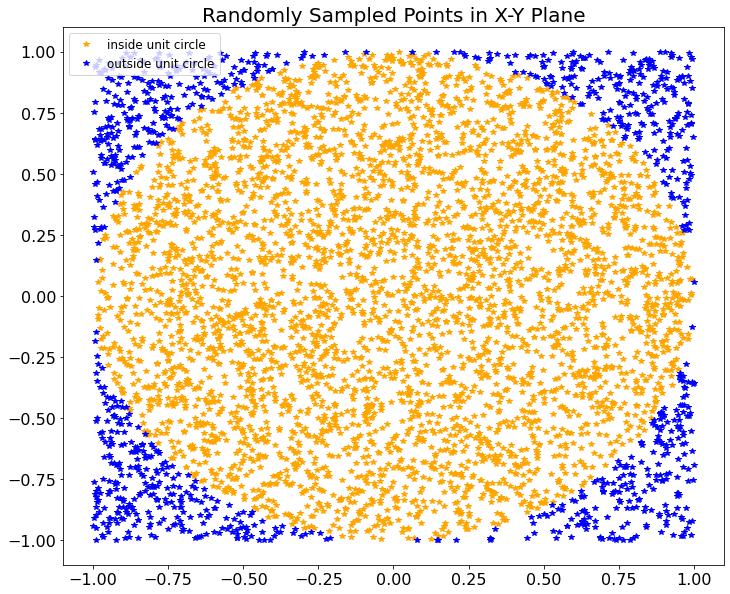

In [5]:
plt.figure(figsize=(10,8))
plt.plot(df.loc[inCircleMask,'x'],df.loc[inCircleMask,'y'],\
         color='orange',marker='*',linestyle='',label='inside unit circle')
plt.plot(df.loc[~inCircleMask,'x'],df.loc[~inCircleMask,'y'],\
         color='blue',marker='*',linestyle='',label='outside unit circle')
plt.tight_layout()
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Randomly Sampled Points in X-Y Plane',fontsize=20)
plt.show()

In [6]:
piEstimate = 4*(len(df[ df['inCircle'] == True ]) / len(df) )

In [7]:
print(piEstimate)

3.1744


In [8]:
dfp = pd.DataFrame()

In [9]:
idx=-1
for numPoints in range(100,100000,100):
    ## calculate points in circle
    df = pd.DataFrame()
    df['x'] = np.random.uniform(-1,1,numPoints)
    df['y'] = np.random.uniform(-1,1,numPoints)
    inCircleMask = (df['x']**2 + df['y']**2) < 1
    df.loc[inCircleMask,'inCircle'] = True
    
    ## save results
    idx+=1
    dfp.loc[idx,'numPoints'] = numPoints
    dfp.loc[idx,'piEstimate'] = 4*(len(df[ df['inCircle'] == True ]) / len(df) )

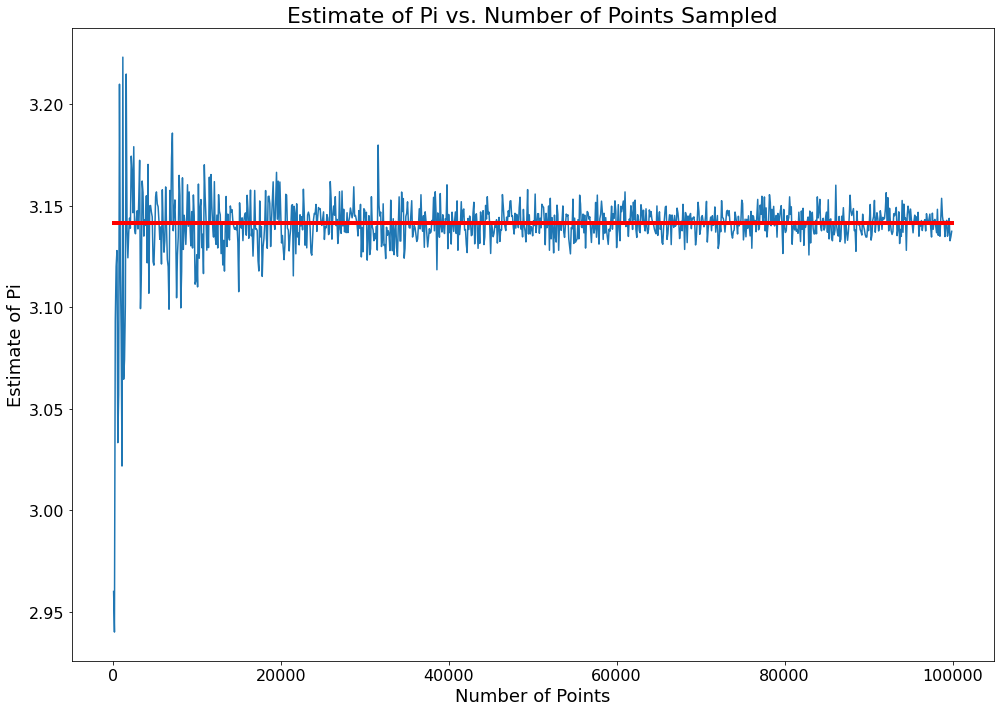

In [10]:
plt.figure(figsize=(14,10))
plt.plot(dfp['numPoints'],dfp['piEstimate'])
plt.plot([dfp['numPoints'].min(),dfp['numPoints'].max()],\
         [np.pi,np.pi],color='red',linewidth=4)
plt.ylabel('Estimate of Pi',fontsize=18)
plt.xlabel('Number of Points',fontsize=18)
plt.title('Estimate of Pi vs. Number of Points Sampled',fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()